## Brooklyn Nine-Nine Ratings Analysis

![title](b_99.jpg)

In [879]:
# import libraries
from urllib.request import urlopen as ureq
from bs4 import BeautifulSoup as soup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import time

### Episode Info from Wikipedia

#### Scraping data

In [887]:
# get html
url = "https://en.wikipedia.org/wiki/List_of_Brooklyn_Nine-Nine_episodes"
uclient = ureq(url)
page_html = uclient.read()
uclient.close()

# get episode data on page
page_soup = soup(page_html,"html.parser")
seasons = page_soup.findAll("table",{"class":"wikitable plainrowheaders wikiepisodetable"})
seasons = seasons[:-1]
seasons = seasons[:-1]

# store data in a pandas dataframe
column_names = ['prod_code','episode_title','directed_by','written_by','air_date','us_viewers','season_no','episode_no']
wiki_b99 = pd.DataFrame(columns=column_names)
for season in seasons:
    episodes = season.findAll("tr",{"class":"vevent"})
    for episode in episodes:
        wiki_b99 = wiki_b99.append({'prod_code': episode.findAll('td')[5].text, 'episode_title': episode.findAll('td')[1].text, 'directed_by': episode.findAll('td')[2].text, 'written_by': episode.findAll('td')[3].text, 'air_date': episode.findAll('td')[4].span.span.text, 'us_viewers': episode.findAll('td')[6].text}, ignore_index=True)

# clean columns
wiki_b99['episode_title'] = wiki_b99['episode_title'].str.replace('"','')
wiki_b99['us_viewers'] = wiki_b99['us_viewers'].str.split('[').str[0]

# clean data for title = 'The Fugitive'
wiki_b99 = wiki_b99[wiki_b99['episode_title']!='The Fugitive']
wiki_b99 = wiki_b99.append({'prod_code': '411', 'episode_title': 'The Fugitive: Part 1', 'directed_by': 'Rebecca Asher', 'written_by': 'Carol Kolb', 'air_date': '2017-01-01', 'us_viewers': '3.49'}, ignore_index=True)
wiki_b99 = wiki_b99.append({'prod_code': '412', 'episode_title': 'The Fugitive: Part 2', 'directed_by': 'Ryan Case', 'written_by': 'Justin Noble & Jessica Polonsky', 'air_date': '2017-01-01', 'us_viewers': '3.49'}, ignore_index=True)

wiki_b99['season_no'] = wiki_b99['prod_code'].str[:1]
wiki_b99['episode_no'] = wiki_b99['prod_code'].str[1:3]

print(wiki_b99.shape)
wiki_b99.head()

(130, 8)


,prod_code,episode_title,directed_by,written_by,air_date,us_viewers,season_no,episode_no
0,101,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,6.17,1,01
1,102,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,4.03,1,02
2,105,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,3.43,1,05
3,106,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,3.34,1,06
4,104,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,3.43,1,04


#### Creating additional columns

In [888]:
# create parts
column_names = ['air_date','parts']
parts = pd.DataFrame(columns=column_names)
parts['air_date'] = wiki_b99[wiki_b99.groupby('air_date')['air_date'].transform('size') > 1]['air_date'].unique()
parts['parts'] = '2'
wiki_b99 = pd.merge(wiki_b99,two_part,on=['air_date'],how='left')
wiki_b99 = wiki_b99.fillna(1)

# create episode type
column_names = ['episode_title','episode_type']
data = [['Halloween','Halloween Episode'], ['Pontiac Bandit','Pontiac Bandit Episode'], ['Charges and Specs','Season Finale'], ['Undercover','Season Premiere'], ['Halloween II','Halloween Episode'], ['The Pontiac Bandit Returns','Pontiac Bandit Episode'], ['Johnny and Dora','Season Finale'], ['New Captain','Season Premiere'], ['Halloween III','Halloween Episode'], ['The Cruise','Pontiac Bandit Episode'], ['Greg and Larry','Season Finale'], ['Coral Palms: Part 1','Season Premiere'], ['Halloween IV','Halloween Episode'], ['The Fugitive: Part 2','Pontiac Bandit Episode'], ['Crime and Punishment','Season Finale'], ['The Big House: Part 1','Season Premiere'], ['HalloVeen','Halloween Episode'], ['99','99th Episode'], ['Game Night','100th Episode'], ['The Box','Bottle Episode'], ['Jake & Amy','Season Finale'], ['Honeymoon','Season Premiere'], ['A Tale of Two Bandits','Pontiac Bandit Episode'], ['Cinco de Mayo','Halloween Episode'], ['Suicide Squad','Season Finale']
]
episode_type = pd.DataFrame(data=data,columns=column_names)
wiki_b99 = pd.merge(wiki_b99,episode_type,on=['episode_title'],how='left')
wiki_b99 = wiki_b99.fillna('Normal Episode')

# create network
column_names = ['season_no','network']
data = [['1','Fox'], ['2','Fox'], ['3','Fox'], ['4','Fox'], ['5','Fox'], ['6','NBC']]
network = pd.DataFrame(data=data,columns=column_names)
wiki_b99 = pd.merge(wiki_b99,network,on=['season_no'],how='left')

# correct column datatypes
wiki_b99['air_date']=pd.to_datetime(wiki_b99['air_date'])
wiki_b99['us_viewers']=pd.to_numeric(wiki_b99['us_viewers'])

wiki_b99
#wiki_b99.to_csv('wiki_b99.csv')

,prod_code,episode_title,directed_by,written_by,air_date,us_viewers,season_no,episode_no,parts,episode_type,network
0,101,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,6.17,1,01,1,Normal Episode,Fox
1,102,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,4.03,1,02,1,Normal Episode,Fox
2,105,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,3.43,1,05,1,Normal Episode,Fox
3,106,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,3.34,1,06,1,Normal Episode,Fox
4,104,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,3.43,1,04,1,Normal Episode,Fox
...,...,...,...,...,...,...,...,...,...,...,...
125,616,Cinco de Mayo,Rebecca Asher,David Phillips,2019-05-09,1.83,6,16,1,Halloween Episode,NBC
126,617,Sicko,Matthew Nodella,Justin Noble,2019-05-16,1.63,6,17,2,Normal Episode,NBC
127,618,Suicide Squad,Dan Goor,Dan Goor & Luke Del Tredici,2019-05-16,1.55,6,18,2,Season Finale,NBC
128,411,The Fugitive: Part 1,Rebecca Asher,Carol Kolb,2017-01-01,3.49,4,11,2,Normal Episode,Fox


#### Exploring Data 

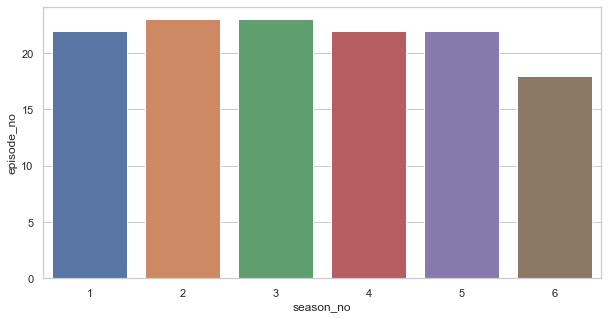

In [889]:
# episode count by season
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax = sns.barplot(x="season_no", y="episode_no", data=wiki_b99.groupby(['season_no']).count().reset_index())

We observe that seasons 1 to 5 have more than 20 episodes. Season 6 has only 18 episodes as this was the season when the show moved from Fox to NBC and got a late premiere.

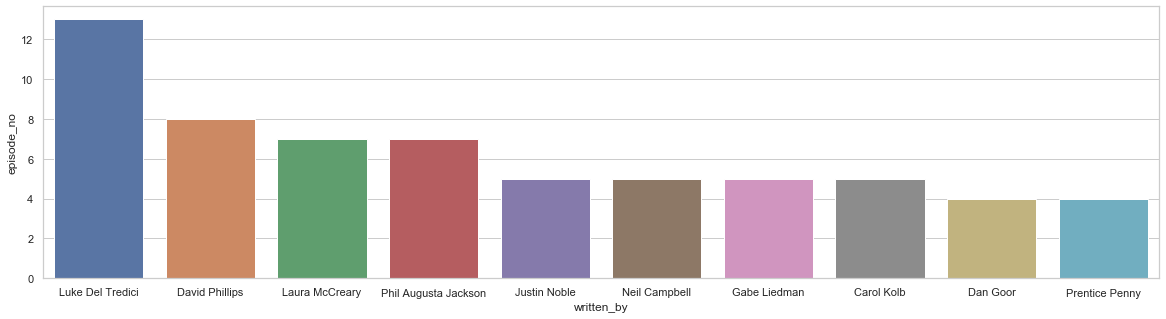

In [890]:
# episode count by writer
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.barplot(x="written_by", y="episode_no", data=wiki_b99.groupby(['written_by']).count().reset_index().sort_values(by='episode_no',ascending=False).head(10))

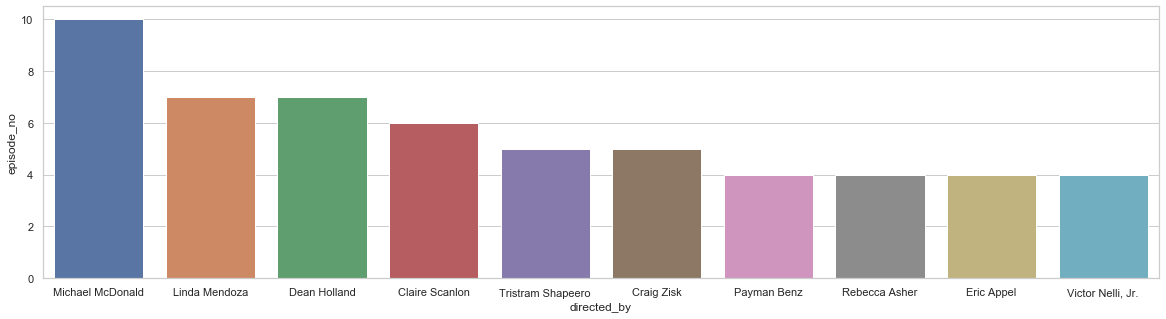

In [891]:
# episode count by director
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.barplot(x="directed_by", y="episode_no", data=wiki_b99.groupby(['directed_by']).count().reset_index().sort_values(by='episode_no',ascending=False).head(10))

We observe that writer Luke Del Tredici and director Michael McDonald are the top writer and director respectively by episode count. The show's creator Dan Goor wrote 4 episodes and ranks #9 among the top writers by episode count.

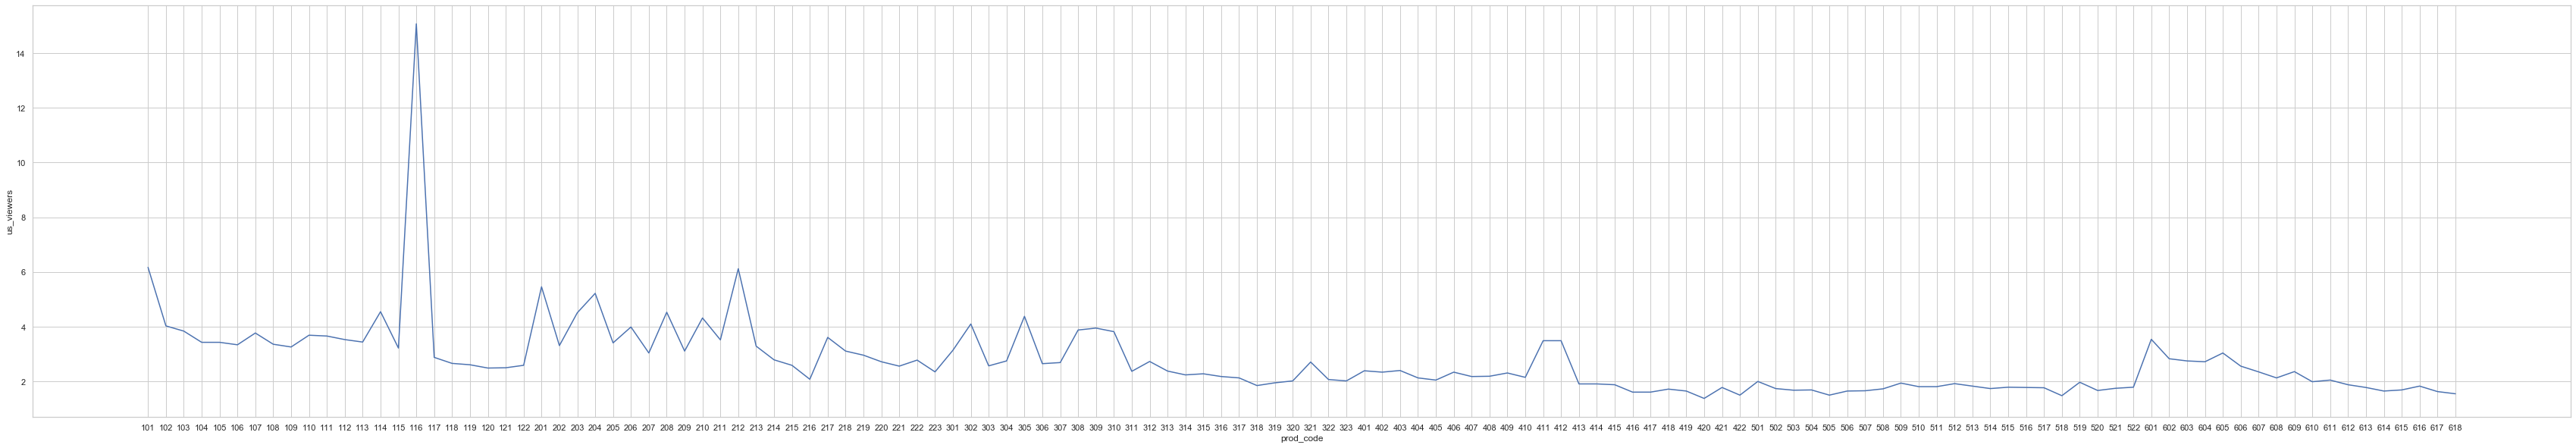

In [892]:
# total US viewers by season and episode
fig, ax = plt.subplots(1,1,figsize=(60,10))
sns.lineplot(x="prod_code", y="us_viewers", data=wiki_b99.groupby(['prod_code']).sum().reset_index())

We observe that the US viewers shows a decreasing trend with spikes for certain episodes. 

S01E15-Operation: Broken Feather was watched approximately 15 million US viewers which is unusally high for the show. This episode was written by show creator Dan Goor & Michael Schur.

We observe a spike during S06E01-Honeymoon when the show moved from Fox to NBC. This season premiere episode was watched by twice as many viewers as the past season's finale episode.

,season_no,us_viewers
0,1,3.978182
1,2,3.538261
2,3,2.733043
3,4,2.109545
4,5,1.759091
5,6,2.240556


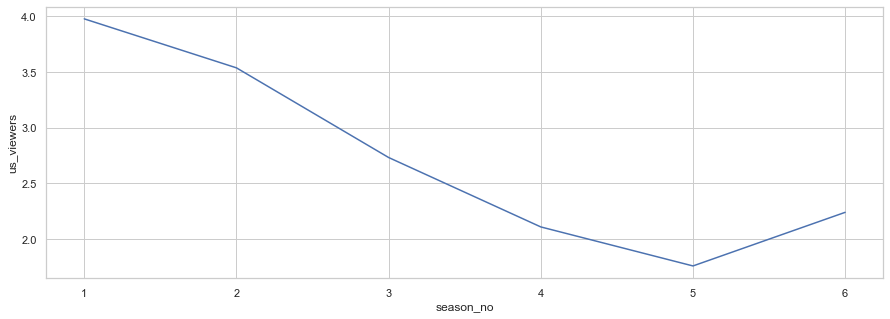

In [893]:
# average US viewers by season
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.lineplot(x="season_no", y="us_viewers", data=wiki_b99.groupby(['season_no']).mean().reset_index())
wiki_b99.groupby(['season_no']).mean().reset_index()

We observe that the average US viewers decreases from season 1 to season 5 and then increases 1.27 times in season 6 compared to season 5. The show became really popular when season 6 was airing as its cancellation after season 5 by Fox was a hot discussion topic on Reddit and Twitter leading to a lot of word-of-mouth marketing. (I also was among the viewers who discovered this brilliant show during this time)

,network,us_viewers
0,Fox,2.829196
1,NBC,2.240556


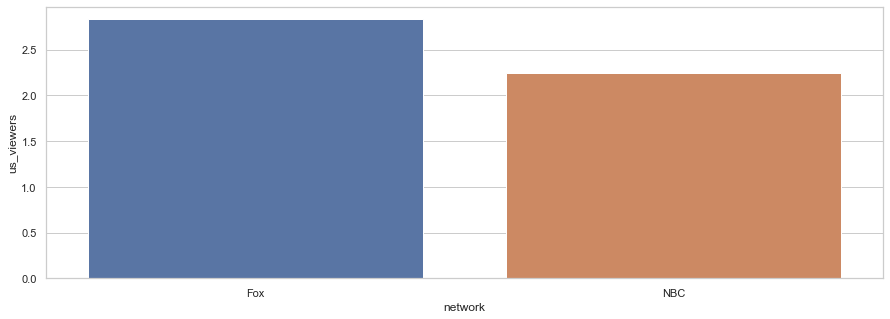

In [894]:
# average US viewers by network
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x="network", y="us_viewers", data=wiki_b99.groupby(['network']).mean().reset_index())
wiki_b99.groupby(['network']).mean().reset_index()

We observe that the show 1.26 times more average US viewers when it aired on Fox than when it aired on NBC. Note that we have five seasons worth of data for Fox and only one season worth of data for NBC.

,episode_type,us_viewers
0,100th Episode,1.810000
1,99th Episode,1.940000
2,Bottle Episode,1.780000
3,Halloween Episode,3.156667
4,Normal Episode,2.740286
5,Pontiac Bandit Episode,3.334000
6,Season Finale,1.966667
7,Season Premiere,3.306000


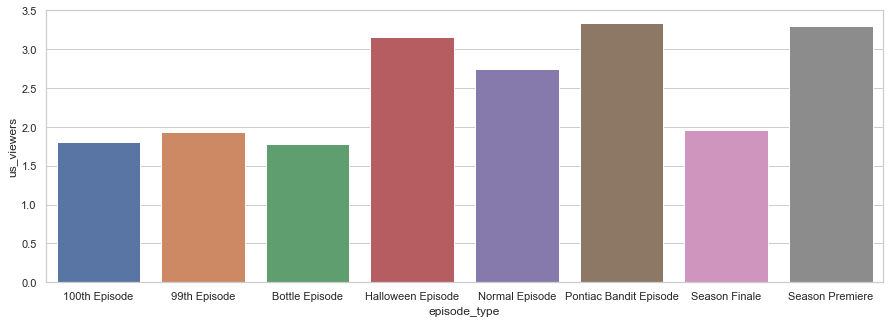

In [895]:
# average US viewers by episode type
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x="episode_type", y="us_viewers", data=wiki_b99.groupby(['episode_type']).mean().reset_index())
wiki_b99.groupby(['episode_type']).mean().reset_index()

We observe that the show's 99th and 100th episode had approximately 2/3rd of the normal viewership count.

Season premiere episodes have 20.66% more average US viewers than normal episodes. The same is not true for Season finale episodes which have 28.2% less average US viewers than that of normal episodes.

Halloween heist episodes have 15.19% more average US viewers than normal episodes.

Pontaic bandit episodes starring guest star 'Craig Robinson' have 21.67% more average US viewers than normal episodes.

,parts,us_viewers
0,1,2.850172
1,2,1.898571


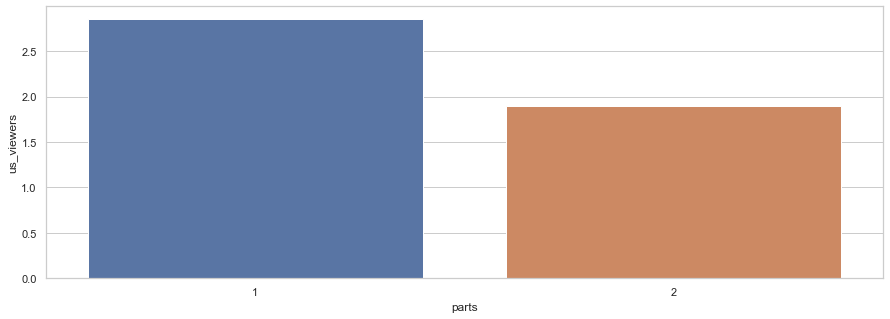

In [896]:
# average US viewers by parts
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x="parts", y="us_viewers", data=wiki_b99.groupby(['parts']).mean().reset_index())
wiki_b99.groupby(['parts']).mean().reset_index()

We expect that two-part episodes aired back-to-back would pull in more viewers but single episodes have 1.5 times the average US viewers than two-part episodes.


### Critic Ratings from The A.V. Club

#### Scraping data

In [900]:
# fetch data for 20 episodes per season
column_names = ['season_no','air_date','avclub_rating']
av_club_b99 = pd.DataFrame(columns=column_names)
    
for i in range(1,7):
    # get html
    url = "https://www.avclub.com/c/tv-review/brooklyn-nine-nine/season-"+str(i)
    uclient = ureq(url)
    page_html = uclient.read()
    uclient.close()
    
    # get articles on page
    page_soup = soup(page_html,"html.parser")
    articles = page_soup.findAll("article",{"class":"js_post_item cw4lnv-0 glgzMx"})
    
    # store data in a pandas dataframe
    for article in articles:
        av_club_b99 = av_club_b99.append({'season_no': i, 'avclub_rating': article.figure.div.div.text, 'air_date': article.div.findAll("div",{"class":"sc-3nbvzd-1 VhErj"})[0].text}, ignore_index=True)

av_club_b99['air_date'] = pd.to_datetime(av_club_b99['air_date'])

print(av_club_b99.shape)
av_club_b99.head()

(115, 3)


,season_no,air_date,avclub_rating
0,1,2014-03-25,A
1,1,2014-03-19,B+
2,1,2014-03-12,A-
3,1,2014-03-04,A-
4,1,2014-02-26,B-


In [901]:
# fetch data for remaining episodes per season
# get min date per season
av_club_b99_date = av_club_b99.groupby('season_no').agg({'air_date':['min']})['air_date','min']

for i in range(1,7):
    # convert min date to epoch timestamp in milliseconds
    date_time = av_club_b99_date
    pattern = '%Y-%m-%d %H:%M:%S'
    av_club_b99_epoch = int(time.mktime(time.strptime(str(date_time[i]), pattern)))
    
    # get html
    url = "https://www.avclub.com/c/tv-review/brooklyn-nine-nine/season-"+str(i)+'?startTime='+str(av_club_b99_epoch*1000)
    uclient = ureq(url)
    page_html = uclient.read()
    uclient.close()
    
    # get articles on page
    page_soup = soup(page_html,"html.parser")
    articles = page_soup.findAll("article",{"class":"js_post_item cw4lnv-0 glgzMx"})
    
    # store data in a pandas dataframe (av_club_b99)
    for article in articles:
        av_club_b99 = av_club_b99.append({'season_no': i, 'avclub_rating': article.figure.div.div.text, 'air_date': article.div.findAll("div",{"class":"sc-3nbvzd-1 VhErj"})[0].text}, ignore_index=True)
        
av_club_b99['air_date'] = pd.to_datetime(av_club_b99['air_date'])

print(av_club_b99.shape)
av_club_b99.head()

(123, 3)


,season_no,air_date,avclub_rating
0,1,2014-03-25,A
1,1,2014-03-19,B+
2,1,2014-03-12,A-
3,1,2014-03-04,A-
4,1,2014-02-26,B-


#### Cleaning data

In [902]:
# remove air dates with missing ratings
av_club_b99 = av_club_b99[av_club_b99['avclub_rating']!='']

print(av_club_b99.shape)
av_club_b99.head()

(116, 3)


,season_no,air_date,avclub_rating
0,1,2014-03-25,A
1,1,2014-03-19,B+
2,1,2014-03-12,A-
3,1,2014-03-04,A-
4,1,2014-02-26,B-


#### Combining AV Club Ratings Data with Wikipedia Episode Info Data

In [1013]:
combined = pd.merge(wiki_b99, av_club_b99[['air_date','avclub_rating']], on='air_date', how='left')

av_club_b99['air_date1'] = av_club_b99['air_date'] - pd.DateOffset(1)

combined=pd.merge(combined, av_club_b99[['air_date1','avclub_rating']], left_on='air_date', right_on='air_date1', how='left')

combined['avclub_rating_x'] = combined['avclub_rating_x'].fillna(combined['avclub_rating_y'])

# manually aggregate missing AV Club ratings data
avclub_ratings_missing = pd.read_csv('avclub_ratings_missing.csv', dtype={'prod_code': object})

combined=pd.merge(combined, avclub_ratings_missing, on='prod_code', how='left')
combined['avclub_rating'] = combined['avclub_rating'].fillna(combined['avclub_rating_x'])

combined = combined.drop(columns=['avclub_rating_x', 'air_date1', 'avclub_rating_y'])

print(combined.shape)
combined.head()

(130, 12)


,prod_code,episode_title,directed_by,written_by,air_date,us_viewers,season_no,episode_no,parts,episode_type,network,avclub_rating
0,101,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,6.17,1,01,1,Normal Episode,Fox,B+
1,102,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,4.03,1,02,1,Normal Episode,Fox,B
2,105,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,3.43,1,05,1,Normal Episode,Fox,B+
3,106,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,3.34,1,06,1,Normal Episode,Fox,B
4,104,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,3.43,1,04,1,Normal Episode,Fox,A-


In [1014]:
column_names = ['rating_letter','rating_num']
data = [['A',10], ['A-',9], ['B+',8], ['B',7], ['B-',6], ['C+',5], ['C',4], ['C-',3], ['D+',2], ['D',1]]
av_club_rating = pd.DataFrame(data,columns = column_names)
av_club_rating

combined = pd.merge(combined, av_club_rating, left_on='avclub_rating',right_on='rating_letter')
combined['avclub_rating'] = combined['rating_num']

combined = combined.drop(columns=['rating_letter', 'rating_num'])

print(combined.shape)
combined.head()

(130, 12)


,prod_code,episode_title,directed_by,written_by,air_date,us_viewers,season_no,episode_no,parts,episode_type,network,avclub_rating
0,101,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,6.17,1,01,1,Normal Episode,Fox,8
1,105,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,3.43,1,05,1,Normal Episode,Fox,8
2,108,Sal's Pizza,Craig Zisk,Lakshmi Sundaram,2013-11-19,3.36,1,08,1,Normal Episode,Fox,8
3,110,Thanksgiving,Jorma Taccone,Luke Del Tredici,2013-11-26,3.69,1,10,1,Normal Episode,Fox,8
4,113,Pontiac Bandit,Craig Zisk,Norm Hiscock & Lakshmi Sundaram,2014-01-07,3.44,1,13,1,Pontiac Bandit Episode,Fox,8


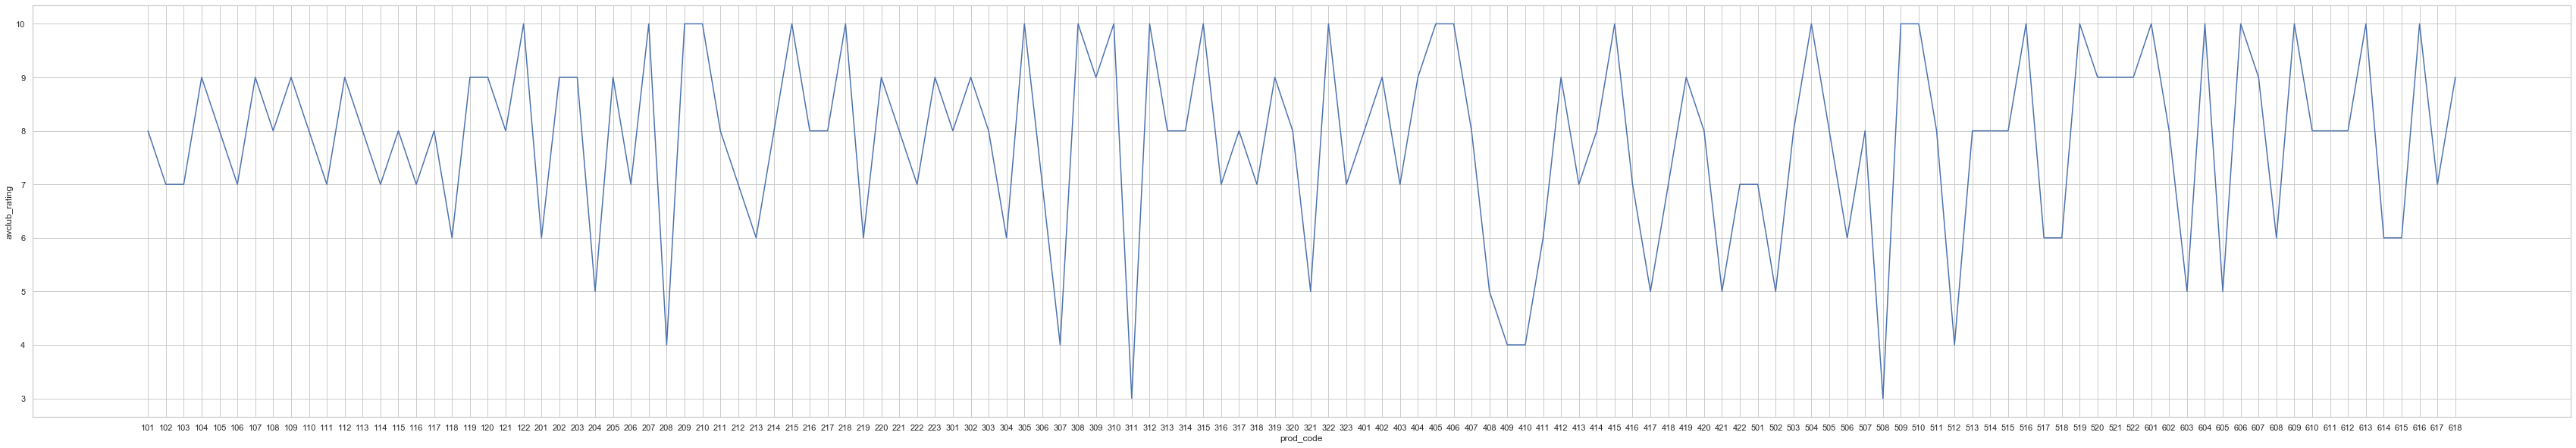

In [1015]:
# AV Club ratings by season and episode
fig, ax = plt.subplots(1,1,figsize=(60,10))
sns.lineplot(x="prod_code", y="avclub_rating", data=combined.groupby(['prod_code']).sum().reset_index())

We observe that the critic ratings for the show fluctuate a lot over the seasons. The largest critic rating drop are during or near the mid-season.

,season_no,us_viewers,avclub_rating
0,1,3.978182,8.000000
1,2,3.538261,7.956522
2,3,2.733043,7.869565
3,4,2.109545,7.363636
4,5,1.759091,7.727273
5,6,2.240556,8.055556


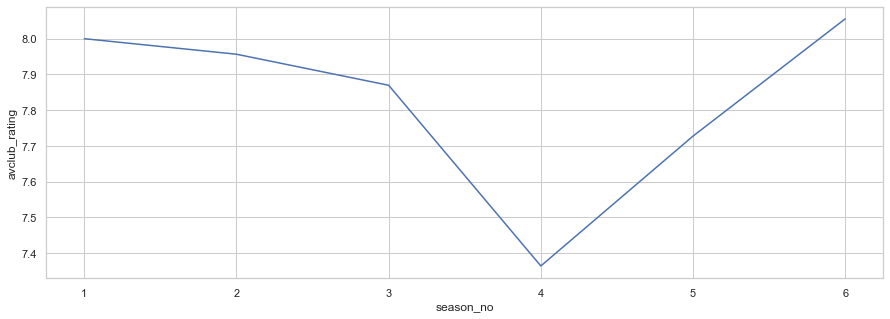

In [1016]:
# average AV club ratings by season
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.lineplot(x="season_no", y="avclub_rating", data=combined.groupby(['season_no']).mean().reset_index())
combined.groupby(['season_no']).mean().reset_index()

We observe that critic rating decreases from season 1 to season 4 and then increases. Season 6's average critic rating is slightly higher than season 1's.

,network,us_viewers,avclub_rating
0,Fox,2.829196,7.785714
1,NBC,2.240556,8.055556


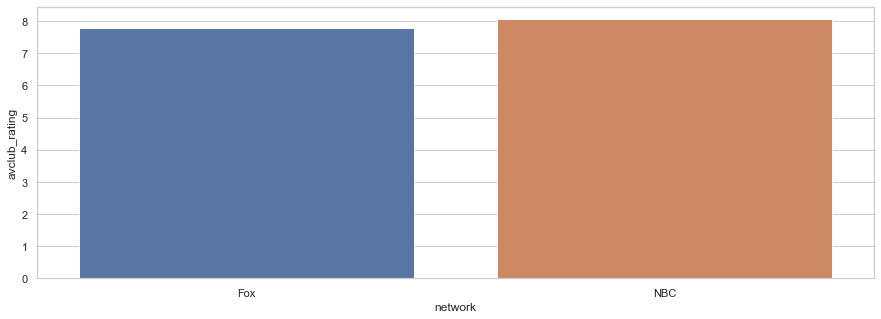

In [1017]:
# average AV Club ratings by network
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x="network", y="avclub_rating", data=combined.groupby(['network']).mean().reset_index())
combined.groupby(['network']).mean().reset_index()

Critic ratings have remained consistent on an overall level despite the show moving from Fox to NBC after Season 5.

,episode_type,us_viewers,avclub_rating
0,100th Episode,1.810000,10.000000
1,99th Episode,1.940000,10.000000
2,Bottle Episode,1.780000,10.000000
3,Halloween Episode,3.156667,9.000000
4,Normal Episode,2.740286,7.647619
5,Pontiac Bandit Episode,3.334000,8.000000
6,Season Finale,1.966667,8.500000
7,Season Premiere,3.306000,7.800000


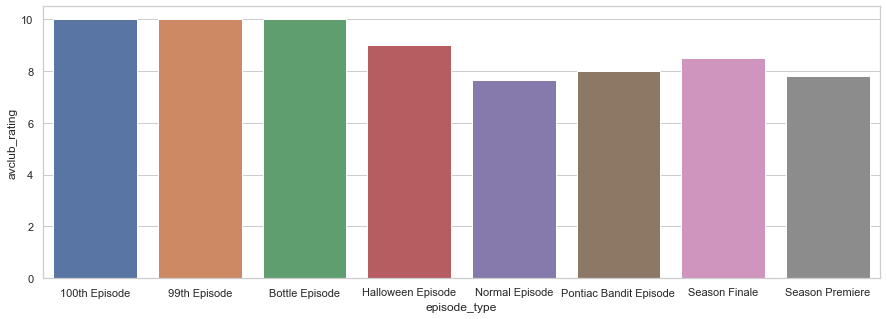

In [1018]:
# average AV Club rating by episode type
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x="episode_type", y="avclub_rating", data=combined.groupby(['episode_type']).mean().reset_index())
combined.groupby(['episode_type']).mean().reset_index()

The show's 100th episode, 99th episode and the bottle episode received perfect 10/10 critic ratings.

Season premiere episodes are only considered slightly better than normal episodes by critics while season finales receive 11% higher ratings from critics compared to normal episodes.

Halloween heist episodes have on an average received the second best critic rating of 9.

Pontaic bandit episodes have on an average received the third best critic rating of 8.

,parts,us_viewers,avclub_rating
0,1,2.850172,7.870690
1,2,1.898571,7.428571


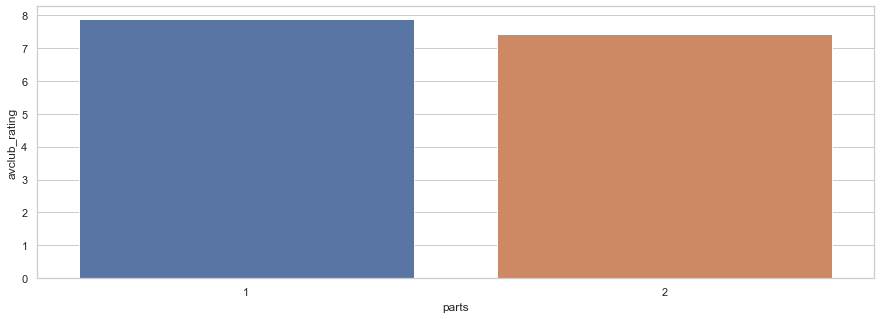

In [1019]:
# average AV club ratings by parts
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x="parts", y="avclub_rating", data=combined.groupby(['parts']).mean().reset_index())
combined.groupby(['parts']).mean().reset_index()

Average critic ratings are similar for single and two-part episodes.

### User Ratings from IMDB

In [1020]:
column_names = ['season_no','episode_no','air_date','imdb_rating','episode_title','total_votes']
imdb_b99 = pd.DataFrame(columns=column_names)

for i in range(1,7):
    # get html
    url = "https://www.imdb.com/title/tt2467372/episodes?season="+str(i)
    uclient = ureq(url)
    page_html = uclient.read()
    uclient.close()
    
    # get episode data on page
    page_soup = soup(page_html,"html.parser")
    episodes = page_soup.findAll("div",{"class":"info"})
    
    # store data in a pandas dataframe
    for episode in episodes:
        imdb_b99 = imdb_b99.append({'season_no':i,'episode_no':episode.meta['content'], 'air_date': episode.findAll("div",{"class":"airdate"})[0].text, 'imdb_rating': episode.findAll("span",{"class":"ipl-rating-star__rating"})[0].text, 'episode_title':episode.a['title'],'total_votes':episode.findAll("span",{"class":"ipl-rating-star__total-votes"})[0].text}, ignore_index=True)

imdb_b99['imdb_rating'] = pd.to_numeric(imdb_b99['imdb_rating'])
imdb_b99['air_date'] = pd.to_datetime(imdb_b99['air_date'].replace('\n', '').str.strip())
imdb_b99['total_votes'] = pd.to_numeric(imdb_b99['total_votes'].str[1:6].str.replace(',',''))
imdb_b99['prod_code'] = imdb_b99['season_no'].astype(str)+('0'+imdb_b99['episode_no']).str[-2:]
imdb_b99['imdb_rating_show'] = 8.4
imdb_b99['total_votes_show'] = 187619

print(imdb_b99.shape)
imdb_b99.head()

(130, 9)


,season_no,episode_no,air_date,imdb_rating,episode_title,total_votes,prod_code,imdb_rating_show,total_votes_show
0,1,1,2013-09-17,7.8,Pilot,3310,101,8.4,187619
1,1,2,2013-09-24,7.6,The Tagger,2687,102,8.4,187619
2,1,3,2013-10-01,7.6,The Slump,2509,103,8.4,187619
3,1,4,2013-10-08,7.8,M.E. Time,2437,104,8.4,187619
4,1,5,2013-10-15,8.0,The Vulture,2347,105,8.4,187619


In [1021]:
combined = pd.merge(combined, imdb_b99[['prod_code','imdb_rating','total_votes','imdb_rating_show','total_votes_show']], on='prod_code',how='left')

print(combined.shape)
combined.head()

(130, 16)


,prod_code,episode_title,directed_by,written_by,air_date,us_viewers,season_no,episode_no,parts,episode_type,network,avclub_rating,imdb_rating,total_votes,imdb_rating_show,total_votes_show
0,101,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,6.17,1,01,1,Normal Episode,Fox,8,7.8,3310,8.4,187619
1,105,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,3.43,1,05,1,Normal Episode,Fox,8,8.0,2347,8.4,187619
2,108,Sal's Pizza,Craig Zisk,Lakshmi Sundaram,2013-11-19,3.36,1,08,1,Normal Episode,Fox,8,7.8,2213,8.4,187619
3,110,Thanksgiving,Jorma Taccone,Luke Del Tredici,2013-11-26,3.69,1,10,1,Normal Episode,Fox,8,8.3,2204,8.4,187619
4,113,Pontiac Bandit,Craig Zisk,Norm Hiscock & Lakshmi Sundaram,2014-01-07,3.44,1,13,1,Pontiac Bandit Episode,Fox,8,8.8,2445,8.4,187619


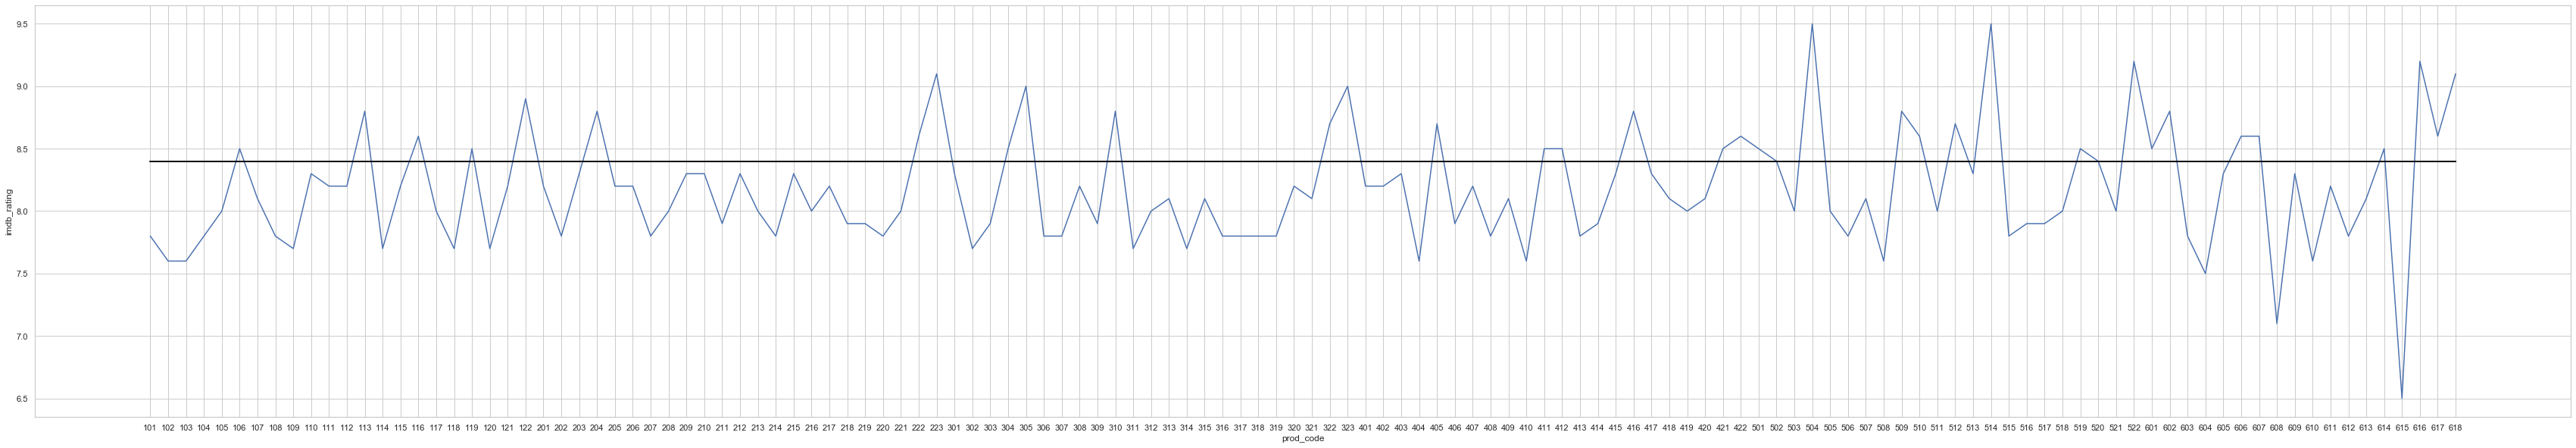

In [1022]:
# IMDB ratings by season and episode
fig, ax = plt.subplots(1,1,figsize=(60,10))
sns.lineplot(x="prod_code", y="imdb_rating", data=combined.groupby(['prod_code']).sum().reset_index())
plt.plot('prod_code', 'imdb_rating_show', data=combined, marker='', color='black', linewidth=2)

30 episodes have higher IMDB ratings than the show's IMDB rating which is 8.4.

The IMDB episode ratings for the show fluctuate a lot over the seasons. The largest IMDB rating drop is observed during S06E15-Return of the King which has a rating of 6.5. This episode marks the return of the slightly controversial character Gina Linetti potrayed by Chelsea Peretti who left in S06E04-Four Movements.

,season_no,us_viewers,avclub_rating,imdb_rating,total_votes,imdb_rating_show,total_votes_show
0,1,3.978182,8.000000,8.086364,2282.272727,8.4,187619.0
1,2,3.538261,7.956522,8.160870,1867.086957,8.4,187619.0
2,3,2.733043,7.869565,8.117391,1654.304348,8.4,187619.0
3,4,2.109545,7.363636,8.181818,1520.727273,8.4,187619.0
4,5,1.759091,7.727273,8.340909,1637.545455,8.4,187619.0
5,6,2.240556,8.055556,8.172222,1449.333333,8.4,187619.0


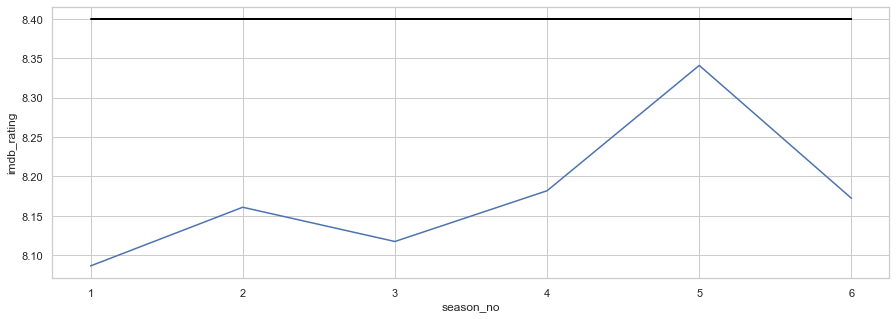

In [1026]:
# average IMDB ratings by season
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.lineplot(x="season_no", y="imdb_rating", data=combined.groupby(['season_no']).mean().reset_index())
plt.plot('season_no', 'imdb_rating_show', data=combined, marker='', color='black', linewidth=2)
combined.groupby(['season_no']).mean().reset_index()

The average IMDB rating is highest for season 5.

The average IMDB rating for all seasons is below the show's IMDB rating which is 8.4.

,network,us_viewers,avclub_rating,imdb_rating,total_votes,imdb_rating_show,total_votes_show
0,Fox,2.829196,7.785714,8.176786,1791.821429,8.4,187619.0
1,NBC,2.240556,8.055556,8.172222,1449.333333,8.4,187619.0


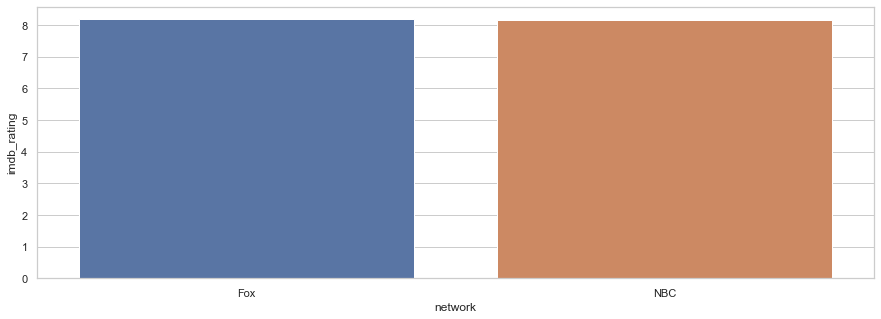

In [1027]:
# average IMDB ratings by network
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x="network", y="imdb_rating", data=combined.groupby(['network']).mean().reset_index())
combined.groupby(['network']).mean().reset_index()

The average IMDB rating is similar for both Fox and NBC.

,episode_type,us_viewers,avclub_rating,imdb_rating,total_votes,imdb_rating_show,total_votes_show
0,100th Episode,1.810000,10.000000,8.600000,1747.000000,8.4,187619.0
1,99th Episode,1.940000,10.000000,8.800000,1715.000000,8.4,187619.0
2,Bottle Episode,1.780000,10.000000,7.900000,1308.000000,8.4,187619.0
3,Halloween Episode,3.156667,9.000000,8.883333,2190.666667,8.4,187619.0
4,Normal Episode,2.740286,7.647619,8.063810,1707.771429,8.4,187619.0
5,Pontiac Bandit Episode,3.334000,8.000000,8.400000,1718.600000,8.4,187619.0
6,Season Finale,1.966667,8.500000,8.983333,1954.666667,8.4,187619.0
7,Season Premiere,3.306000,7.800000,8.340000,1844.200000,8.4,187619.0


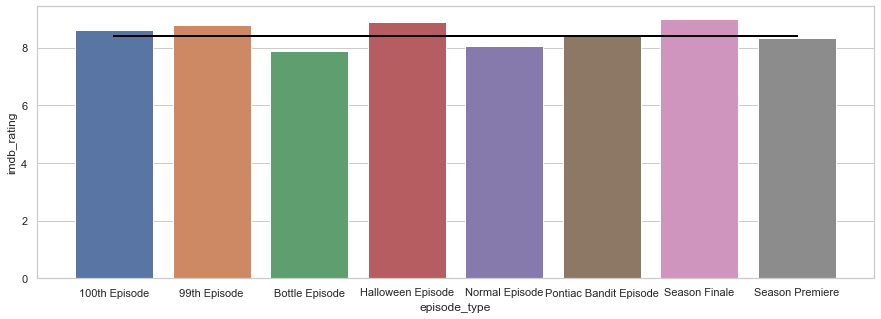

In [1029]:
# average IMDB ratings by episode type
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x="episode_type", y="imdb_rating", data=combined.groupby(['episode_type']).mean().reset_index())
plt.plot('episode_type', 'imdb_rating_show', data=combined, marker='', color='black', linewidth=2)
combined.groupby(['episode_type']).mean().reset_index()

Season premiere episodes receive 3.43% higher average IMDB ratings than normal episodes while season finale episodes receive 11.40% higher average IMDB ratings than normal episodes.

Halloween heist episodes receive 10.16% higher average IMDB ratings than normal episodes while pontaic bandit episodes receive 4.17% higher average IMDB ratings than normal episodes.

The 100th episode, 99th episode, halloween heist episodes and season finale episodes have higher ratings than the show's IMDB rating which is 8.4.

,parts,us_viewers,avclub_rating,imdb_rating,total_votes,imdb_rating_show,total_votes_show
0,1,2.850172,7.870690,8.150862,1777.198276,8.4,187619.0
1,2,1.898571,7.428571,8.385714,1472.642857,8.4,187619.0


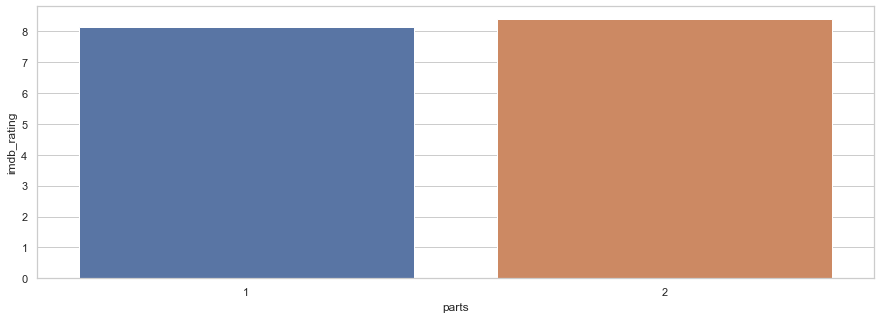

In [1030]:
# average IMDB ratings by parts
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x="parts", y="imdb_rating", data=combined.groupby(['parts']).mean().reset_index())
combined.groupby(['parts']).mean().reset_index()

Two-part episodes receive slightly higher ratings than single episodes.

In [1032]:
combined.to_csv('combined.csv')

### Exploratory Data Analysis on Combined Data

#### IMDB Votes vs IMDB Ratings

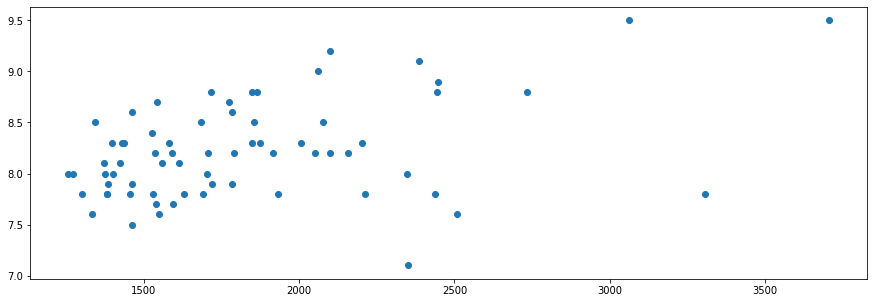

In [208]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.scatter('total_votes_imdb','episode_rating_imdb',data=av_club_imdb_b99)

#### Episode Ratings: IMDB vs The A.V. Club

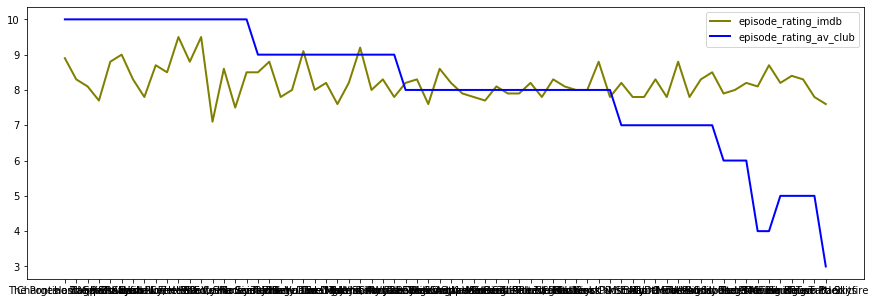

In [209]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.plot( 'episode_name', 'episode_rating_imdb', data=av_club_imdb_b99, marker='', color='olive', linewidth=2)
plt.plot( 'episode_name', 'episode_rating_av_club', data=av_club_imdb_b99, marker='', color='blue', linewidth=2)
plt.legend()

In [1060]:
cat_cols = combined[['episode_type']]

# model
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(cat_cols)
cat_cols_1hot = encoder.transform(cat_cols)
cat_cols_1hot_df = pd.DataFrame(cat_cols_1hot, columns = encoder.get_feature_names())
cat_cols_1hot_df
df = pd.concat([combined,cat_cols_1hot_df],axis=1)
X = df[['us_viewers','x0_100th Episode','x0_99th Episode','x0_Bottle Episode','x0_Halloween Episode','x0_Normal Episode','x0_Pontiac Bandit Episode','x0_Season Finale','x0_Season Premiere']]
y = df['imdb_rating']

from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=12)

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)
model.predict(Xtest)    

array([8.09092262, 8.1027471 , 8.12228319, 8.9246802 , 8.45921008,
       8.03591311, 7.97936127, 8.07909815, 8.02665917, 8.07292886,
       8.09349316, 8.53630733, 8.03128614, 8.09503548, 8.1027471 ,
       8.1099446 , 8.08012636, 8.11405746, 8.1027471 , 8.08372512,
       8.07087243, 8.11919854, 8.00712308, 8.08064047, 8.13513588,
       7.43749186, 8.5405697 , 8.30137905, 8.03077203, 8.94164575,
       8.068816  , 8.10531764, 8.11559979])